## *Задание №1*

1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.
3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [2]:
import os
with open("/Users/mac/Desktop/Новая/python-dh-hw/Harry_Potter.txt", 'r', encoding='utf-8') as a:
    HarryPotter = a.read ()

In [3]:
#Отчищаем от пунктуации
HarryPotterwords = []
for word in HarryPotter.split():
    word = word.strip("’,!?.,!”‘-–""-«»—’*::;‘“’")
    if len(word) != 0:
        HarryPotterwords.append(word)

In [4]:
#Приводим к нижнему регистру 
smalharry = [w.lower() for w in HarryPotterwords]
smallharry = ' '.join(smalharry)

In [18]:
#лемматизируем
from pymystem3 import Mystem

m = Mystem()
lemmas = m.lemmatize("".join(smallharry))

lemaharry = ''.join(lemmas)

In [6]:
#записываем в новый файл
f = open('lemtext.txt', 'w')
for lemtext in lemaharry:
    f.write(lemtext)

f.close()
with open("/Users/mac/Desktop/Новая/python-dh-hw/lemtext.txt", 'r', encoding='utf-8') as b:
    lemtext = b.read ()

In [7]:
from collections import Counter
freqharry  = Counter (lemmas)

In [8]:
HP = len(lemmas)
print(HP)

161229


In [13]:
longharry = len (freqharry)
print (longharry)

5814


In [9]:
harrysfrequency = []
for v in sorted(freqharry.values(), reverse=True):
    harrysfrequency.append(v/HP) 

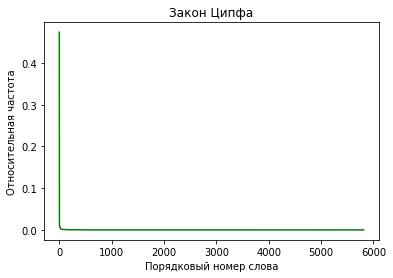

In [32]:
#Проверяем выполняется ли тут закон Ципфа
import matplotlib.pyplot as plt 
X = range(5814)
Y = harrysfrequency
plt.plot(X,Y, color = 'green')
plt.title('Закон Ципфа')
plt.xlabel('Порядковый номер слова')
plt.ylabel('Относительная частота')
plt.show()
#Закон выполняется

In [14]:
#Чистим от стоп-слов
from nltk.corpus import stopwords 
sw = stopwords.words('english')
stopharry = [w for w in lemaharry.split () if w not in sw]

In [15]:
#30 самых частотных
stopfreqharry  = Counter (stopharry) 
print (stopfreqharry.most_common(30)) 

[('harry', 1195), ('said', 794), ('ron', 408), ('hagrid', 332), ('back', 257), ('hermione', 254), ('one', 249), ('got', 196), ('could', 193), ('get', 192), ('like', 188), ('know', 185), ('see', 177), ('professor', 172), ('looked', 169), ('around', 141), ('snape', 140), ('dumbledore', 139), ("he'd", 134), ('going', 134), ('go', 129), ('something', 125), ('think', 121), ('never', 121), ('right', 120), ('look', 119), ('uncle', 119), ('time', 115), ('dudley', 114), ("i'm", 113)]


In [30]:
frequency = []
for v in sorted(stopfreqharry.values(), reverse=True):
    frequency.append(v)

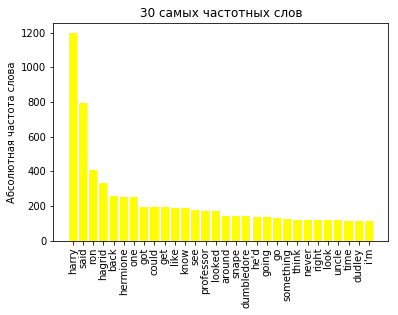

In [33]:
#Строим barplot для 30 самых частотных слов
X= range(30) 
Y= frequency[:30]
plt.bar(X,Y, color = 'yellow')
plt.xticks(X, ['harry', 'said', 'ron', 'hagrid', 'back', 'hermione', 'one', 'got', 'could','get', 'like', 'know', 'see', 'professor', 'looked', 'around', 'snape', 'dumbledore', "he'd", 'going', 'go', 'something', 'think', 'never', 'right', 'look', 'uncle', 'time', 'dudley', "i'm"],rotation=90)
plt.title('30 самых частотных слов')
plt.ylabel('Абсолютная частота слова')
plt.show()